# Initialization

In [22]:
# Loading the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset

In [23]:
# Loading the data of rest_data_us_upd
df_data = pd.read_csv('rest_data_us_upd.csv')

In [24]:
# Visualizing the data
df_data

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20
...,...,...,...,...,...,...
9646,21432,HALL OF JUSTICE,217 W TEMPLE AVE,False,Restaurant,122
9647,21433,FIN-MELROSE,5750 MELROSE AVE,False,Restaurant,93
9648,21434,JUICY WINGZ,6741 HOLLYWOOD BLVD,True,Fast Food,15
9649,21435,MEDIDATE COFFEE,548 S SPRING ST STE 100,False,Cafe,6


# Preparing the data

In [25]:
df_data.info() # Visualizing the data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


Note:
You have identified missing values in the 'chain' column.

In [26]:
df_data.isnull().sum() # checking for missing values

id             0
object_name    0
address        0
chain          3
object_type    0
number         0
dtype: int64

Observation:
Three missing data points were found in the 'chain' column.

In [27]:
df_data['chain'].fillna(False, inplace=True)

Note:
You replaced the missing values in the 'chain' column with 'False' due to the small number of missing data and because your analysis showed that non-chain establishments are more prevalent.

In [28]:
# Checking if all data is filled
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9651 non-null   bool  
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: bool(1), int64(2), object(3)
memory usage: 386.5+ KB


# Data analysis

In [29]:
df_data.head()

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


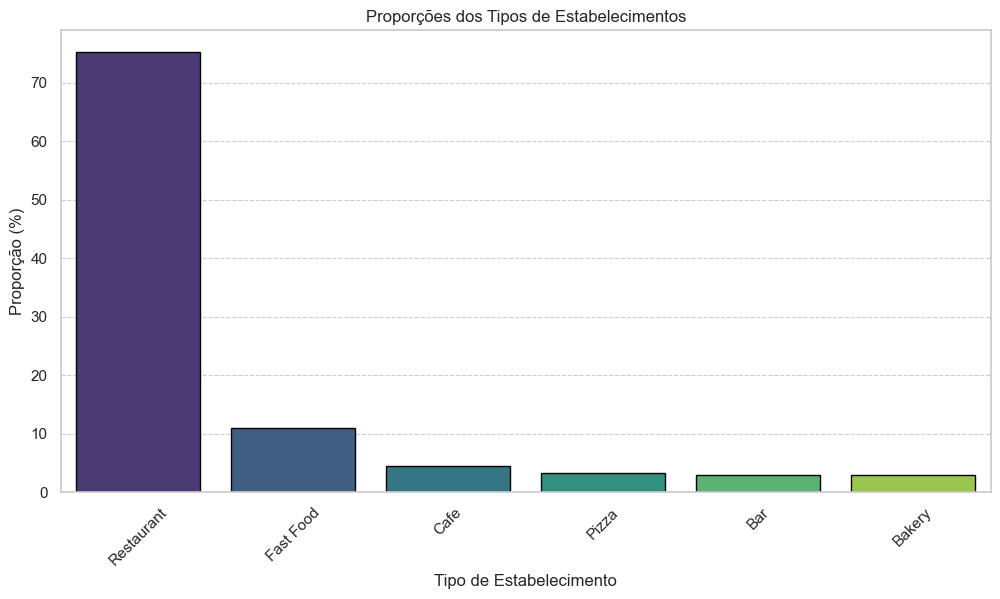

In [30]:
# Creating the proportion count
type_counts = df_data['object_type'].value_counts(normalize=True) * 100

# Converting to a DataFrame for easier use with Seaborn
type_counts_df = type_counts.reset_index()
type_counts_df.columns = ['object_type', 'proportion']

# Configuring the style
sns.set(style="whitegrid")

# Building the chart
plt.figure(figsize=(12, 6))
sns.barplot(x='object_type', y='proportion', data=type_counts_df, palette='viridis', edgecolor='#000000')
plt.title('Proporções dos Tipos de Estabelecimentos')
plt.xlabel('Tipo de Estabelecimento')
plt.ylabel('Proporção (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.8)
plt.show()


Note:
By observing the proportions of the types of establishments, we can see that the majority of the establishments are restaurants.

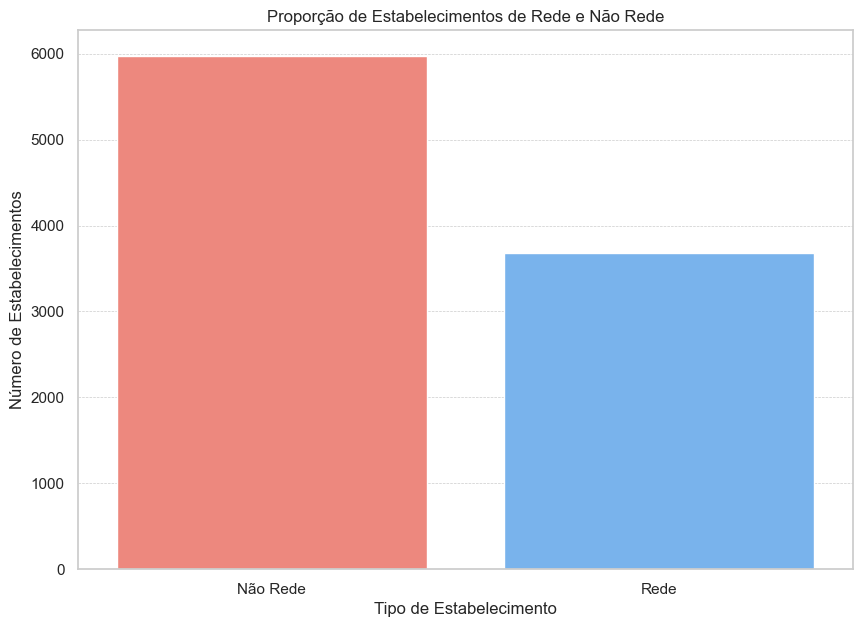

In [31]:
# Investigate the proportions of chain and non-chain establishments. Build a chart.

chain_count = df_data['chain'].value_counts().reset_index()
chain_count.columns = ['chain', 'count']
chain_count['chain'] = chain_count['chain'].map({False: 'Não Rede', True: 'Rede'})

# Configuring the Seaborn style
sns.set(style="whitegrid")

# Plotting the bar chart with Seaborn
plt.figure(figsize=(10, 7))
ax = sns.barplot(x='chain', y='count', data=chain_count, palette=['#FF796C', '#66b3ff'])
ax.set_title('Proporção de Estabelecimentos de Rede e Não Rede')
ax.set_xlabel('Tipo de Estabelecimento')
ax.set_ylabel('Número de Estabelecimentos')
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.show()

In [32]:
chain_count

,chain,count
0,Não Rede,5975
1,Rede,3676


Note:
After investigating the proportions, we can observe that there are fewer chain establishments.

In [33]:
# What type of establishment is typical for chains?

# Defining chain-type establishments
redes = df_data[df_data['chain'] == True]

# Counting chain establishments
tipo_estabelecimento_redes = redes['object_type'].value_counts()
tipo_estabelecimento_redes

object_type
Restaurant    2292
Fast Food      605
Bakery         283
Cafe           266
Pizza          153
Bar             77
Name: count, dtype: int64

In [34]:
# Defining non-chain-type establishments
nao_redes = df_data[df_data['chain'] == False]

# Counting non-chain establishments
tipo_estabelecimento_nao_redes = nao_redes['object_type'].value_counts()
tipo_estabelecimento_nao_redes

object_type
Restaurant    4963
Fast Food      461
Bar            215
Cafe           169
Pizza          167
Name: count, dtype: int64

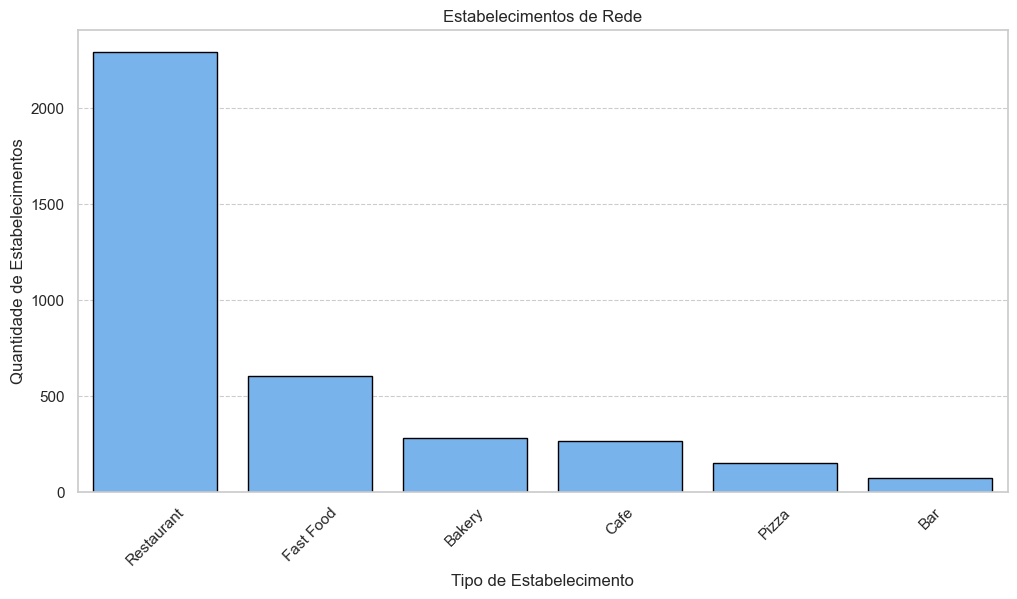

In [35]:
# Converting a Series to a DataFrame
if isinstance(tipo_estabelecimento_redes, pd.Series):
    tipo_estabelecimento_redes = tipo_estabelecimento_redes.reset_index()
    tipo_estabelecimento_redes.columns = ['tipo_estabelecimento', 'quantidade']

# Configuring the Seaborn style
sns.set(style="whitegrid")

# Plotting the bar chart with Seaborn
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='tipo_estabelecimento', y='quantidade', data=tipo_estabelecimento_redes, color='#66b3ff', edgecolor='#000000')
ax.set_title('Estabelecimentos de Rede')
ax.set_xlabel('Tipo de Estabelecimento')
ax.set_ylabel('Quantidade de Estabelecimentos')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.8)
plt.show()

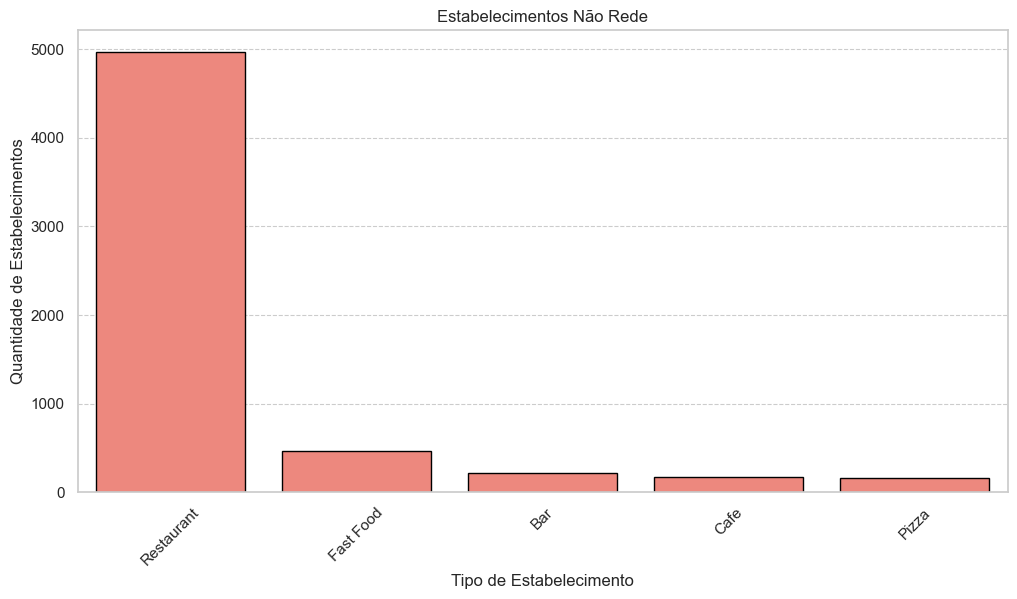

In [36]:

# Converting a Series to a DataFrame
if isinstance(tipo_estabelecimento_nao_redes, pd.Series):
    tipo_estabelecimento_nao_redes = tipo_estabelecimento_nao_redes.reset_index()
    tipo_estabelecimento_nao_redes.columns = ['tipo_estabelecimento', 'quantidade']

# Configuring the Seaborn style
sns.set(style="whitegrid")

# Plotting the bar chart with Seaborn
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='tipo_estabelecimento', y='quantidade', data=tipo_estabelecimento_nao_redes, color='#FF796C', edgecolor='#000000')
ax.set_title('Estabelecimentos Não Rede')
ax.set_xlabel('Tipo de Estabelecimento')
ax.set_ylabel('Quantidade de Estabelecimentos')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.8)
plt.show()

In [37]:
tipo_estabelecimento_nao_redes

,tipo_estabelecimento,quantidade
0,Restaurant,4963
1,Fast Food,461
2,Bar,215
3,Cafe,169
4,Pizza,167


In [38]:
tipo_estabelecimento_redes

,tipo_estabelecimento,quantidade
0,Restaurant,2292
1,Fast Food,605
2,Bakery,283
3,Cafe,266
4,Pizza,153
5,Bar,77


Note:
Restaurants are the most common type for chain establishments, followed by fast food, bakeries, and cafeterias.

Note:
Restaurants are the most common type for non-chain establishments, followed by fast food, bars, cafeterias, and pizzerias.

In [39]:
# What characterizes chains: Many establishments with a small number of seats, or few establishments with many seats?

number_redes = redes['number'].mean()
number_n_redes = nao_redes['number'].mean()
print(f"Média de assentos por estabelecimentos de redes: {number_redes:.2f}")
print(f"Média de assentos por estabelecimentos não redes: {number_n_redes:.2f}")

Média de assentos por estabelecimentos de redes: 39.69
Média de assentos por estabelecimentos não redes: 46.16


Note:
After looking at the average number of seats per establishment, we can characterize chains as having many establishments with a small number of seats.

In [40]:
# Determine the average number of seats for each type of restaurant.
# On average, which type of restaurant has the largest number of seats? Build charts.

# Grouping by the average number of seats for each type of establishment
mean_seats = df_data.groupby('object_type')['number'].mean().sort_values(ascending=False)
print(mean_seats)

type_mean_seats = mean_seats.idxmax()
max_mean_seats = mean_seats.max()


print(f"O tipo de estabelecimento com maior média de assentos é o {type_mean_seats} com uma média de assentos de {max_mean_seats:.2f}%")

object_type
Restaurant    48.042316
Bar           44.767123
Fast Food     31.837711
Pizza         28.459375
Cafe          25.000000
Bakery        21.773852
Name: number, dtype: float64
O tipo de estabelecimento com maior média de assentos é o Restaurant com uma média de assentos de 48.04%


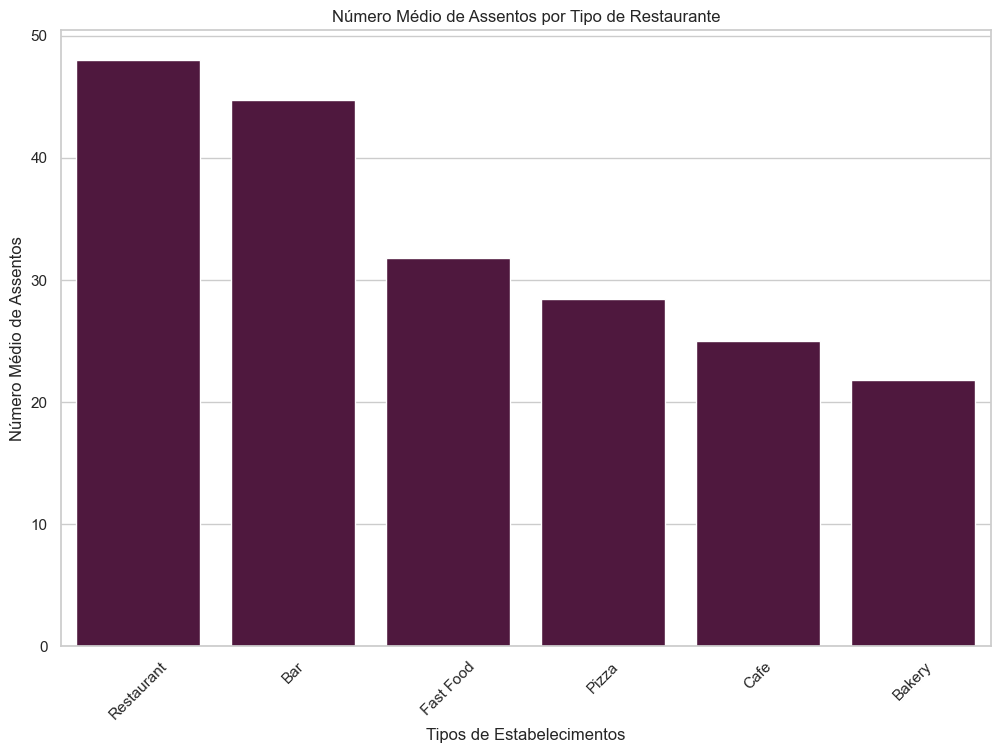

In [41]:
# Converting mean_seats to a DataFrame
if isinstance(mean_seats, pd.Series):
    mean_seats = mean_seats.reset_index()
    mean_seats.columns = ['tipo_estabelecimento', 'numero_medio_de_assentos']

# Configuring the Seaborn style
sns.set(style="whitegrid")

# Plotting the bar chart with Seaborn
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='tipo_estabelecimento', y='numero_medio_de_assentos', data=mean_seats, color='#580F41')
ax.set_title('Número Médio de Assentos por Tipo de Restaurante')
ax.set_xlabel('Tipos de Estabelecimentos')
ax.set_ylabel('Número Médio de Assentos')
plt.xticks(rotation=45)
plt.show()


In [42]:
# Extract the street names from the address column into a separate column.

# Function to extract just the street name
def extract_street_name(address):
    # Splitting the address into parts and removing the first part (the number)
    partes = address.split(' ')
    return ' '.join(partes[1:]) if len(partes) > 1 else address

# Applying the function to the address column
df_data['street_name'] = df_data['address'].apply(extract_street_name)
df_data

,id,object_name,address,chain,object_type,number,street_name
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26,N EAGLE ROCK BLVD
1,11787,REILLY'S,100 WORLD WAY 120,False,Restaurant,9,WORLD WAY 120
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD 253,False,Fast Food,20,HOLLYWOOD BLVD 253
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,W SUNSET BLVD
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20,ECHO PARK AVE
...,...,...,...,...,...,...,...
9646,21432,HALL OF JUSTICE,217 W TEMPLE AVE,False,Restaurant,122,W TEMPLE AVE
9647,21433,FIN-MELROSE,5750 MELROSE AVE,False,Restaurant,93,MELROSE AVE
9648,21434,JUICY WINGZ,6741 HOLLYWOOD BLVD,True,Fast Food,15,HOLLYWOOD BLVD
9649,21435,MEDIDATE COFFEE,548 S SPRING ST STE 100,False,Cafe,6,S SPRING ST STE 100


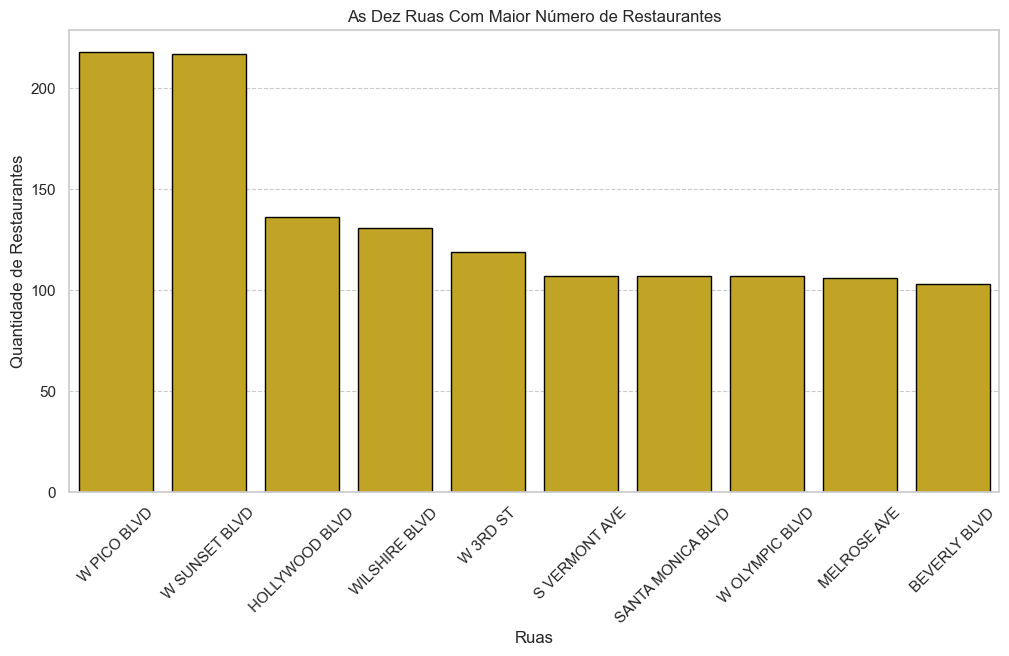

In [43]:
# Finding the ten streets with the highest number of restaurants
top_10_street = df_data[df_data['object_type'] == 'Restaurant'].groupby('street_name')['object_name'].count().sort_values(ascending=False).head(10).reset_index()
top_10_street.columns = ['street_name', 'restaurant_count']

# Configuring the Seaborn style
sns.set(style="whitegrid")

# Plotting the bar chart with Seaborn
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='street_name', y='restaurant_count', data=top_10_street, color='#DBB40C', edgecolor='#000000')
ax.set_title('As Dez Ruas Com Maior Número de Restaurantes')
ax.set_xlabel('Ruas')
ax.set_ylabel('Quantidade de Restaurantes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.8)
plt.show()

In [44]:
top_10_street

,street_name,restaurant_count
0,W PICO BLVD,218
1,W SUNSET BLVD,217
2,HOLLYWOOD BLVD,136
3,WILSHIRE BLVD,131
4,W 3RD ST,119
5,S VERMONT AVE,107
6,SANTA MONICA BLVD,107
7,W OLYMPIC BLVD,107
8,MELROSE AVE,106
9,BEVERLY BLVD,103


Note:
When analyzing the ten streets with the highest number of restaurants, we can see that "W PICO BLVD" and "W SUNSET BLVD" stand out with a significant difference, having about a hundred more restaurants than the other streets.

In [45]:
# Find the number of streets that have only one restaurant.

# Filtering the search for restaurants
restaurant = df_data[df_data['object_type'] == 'Restaurant']
# Grouping the data by street name
count_restaurant = restaurant.groupby('street_name')['object_name'].count()
# Filtering the search for streets with only one restaurant
streets_with_just_one = count_restaurant[count_restaurant == 1]
# Counting the number of streets with only one restaurant
count_restaurant_with_just_one = len(streets_with_just_one)

print("Número de ruas que têm apenas um restaurante:", count_restaurant_with_just_one)

Número de ruas que têm apenas um restaurante: 1977


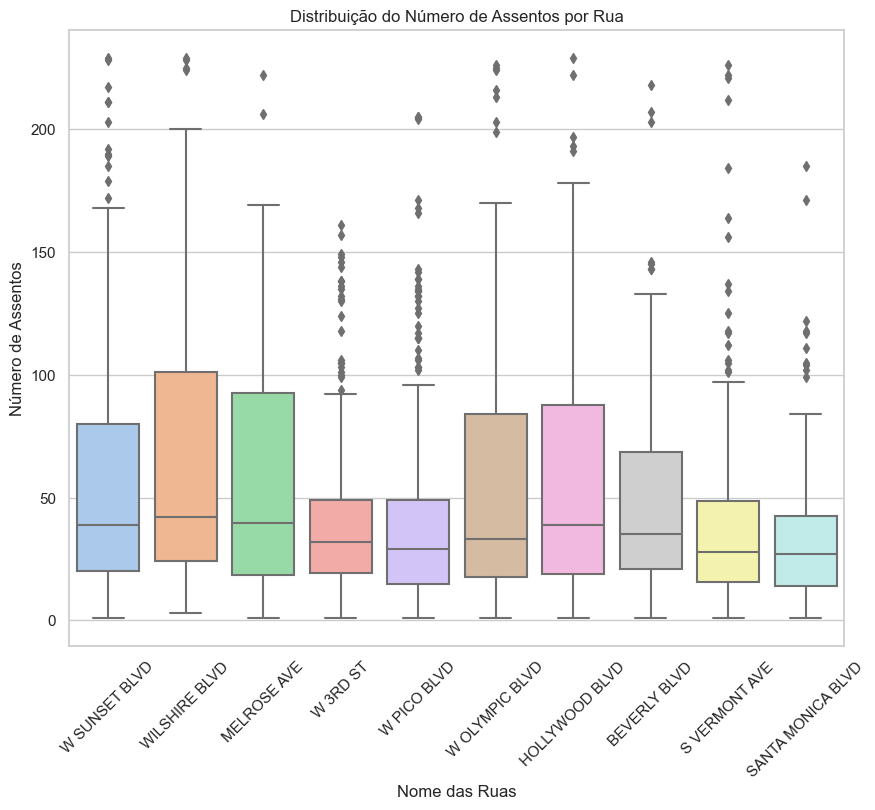

In [46]:
# For the streets with many restaurants, look at the distribution of the number of seats. What trends can you observe?

# Filtering streets with many restaurants
street_with_many_restaurant = count_restaurant[count_restaurant > 100].index

# Filtering the restaurants on these streets
restaurant_in_this_street = df_data[df_data['street_name'].isin(street_with_many_restaurant) & (df_data['object_type'] == 'Restaurant')]

# Configuring the Seaborn style
sns.set(style="whitegrid")

# Generating boxplot graphs for better visualization of the distribution
plt.figure(figsize=(10, 8))
ax = sns.boxplot(x='street_name', y='number', data=restaurant_in_this_street, palette='pastel')
ax.set_title('Distribuição do Número de Assentos por Rua')
ax.set_xlabel('Nome das Ruas')
ax.set_ylabel('Número de Assentos')
plt.xticks(rotation=45)
plt.show()

In [47]:
top_10_street

,street_name,restaurant_count
0,W PICO BLVD,218
1,W SUNSET BLVD,217
2,HOLLYWOOD BLVD,136
3,WILSHIRE BLVD,131
4,W 3RD ST,119
5,S VERMONT AVE,107
6,SANTA MONICA BLVD,107
7,W OLYMPIC BLVD,107
8,MELROSE AVE,106
9,BEVERLY BLVD,103


Notes:
- We can conclude that the majority of establishments are restaurants and fast food places, but restaurants dominate in terms of quantity compared to any other type of establishment in the industry.

- We can identify that there are fewer chain establishments than non-chain establishments.

- "WILSHIRE BLVD" and "HOLLYWOOD BLVD" are ranked 3rd and 4th in the list of the top ten streets with the most restaurants, but they have the highest number of seats in their restaurants.

- The restaurants with the highest number of seats are located on the streets with the largest number of restaurants, such as "W SUNSET BLVD", "MELROSE AVE", and "W OLYMPIC BLVD", which are ranked 2nd, 8th, and 9th in the top ten streets with the most restaurants.

# Recommendation:
 After analyzing the data, we conclude that the most suitable type of establishment is the restaurant, as they are busier and more popular among the public, with an average of 48 seats. Although independent establishments are more numerous, it is important to consider that developing a restaurant with robot waiters could transform into a chain, as chain establishments generate more fame and, consequently, attract more customers, ensuring the success of our venture.

# Presentation: <https://1drv.ms/p/s!Aph4AUJrfEhGszfEi5vdVnvI27LE?e=JEniMB>